## Kaggle Titanic Data Analysis and Prediction 
### Descriptive Analysis:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of a number of passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others

In this analysis, we are taking a deep dive into a sample (train) data and looking for patterns or factors that play a role in chances of survival.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# load the data 
titanic = pd.read_csv("train.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Rename the Survived column for the sake of proper visualization
titanic["Survived"].replace(1, "Survived", inplace=True)
titanic["Survived"].replace(0, "Died", inplace=True)

In [5]:
# fill the missing values in age column with the mean age 
mean_age = round(titanic["Age"].mean())
titanic["Age"].fillna(mean_age, inplace=True)

In [6]:
# Divide age data into ranges for visualization purpose
for age in titanic["Age"]:
    if age in range(0,11):
        titanic["Age"].replace(age, "0-10", inplace=True)
    elif age in range(10,21): 
        titanic["Age"].replace(age, "10-20", inplace=True)
    elif age in range(20,31): 
        titanic["Age"].replace(age, "20-30", inplace=True) 
    elif age in range(30,41): 
        titanic["Age"].replace(age, "30-40", inplace=True) 
    elif age in range(40,51): 
        titanic["Age"].replace(age, "40-50", inplace=True)
    elif age in range(50,61): 
        titanic["Age"].replace(age, "50-60", inplace=True)
    elif age in range(60,71): 
        titanic["Age"].replace(age, "60-70", inplace=True)
    elif age in range(70,81): 
        titanic["Age"].replace(age, "70-80", inplace=True)    
    else: 
        titanic["Age"].replace(age, "other", inplace=True)

Our first step into this deep dive is taking a detailed look at the information of people who boarded the RMC Titanic, determining the average age of people who boarded, the age distribution, how much male/females boarded(gender distribution) etc.

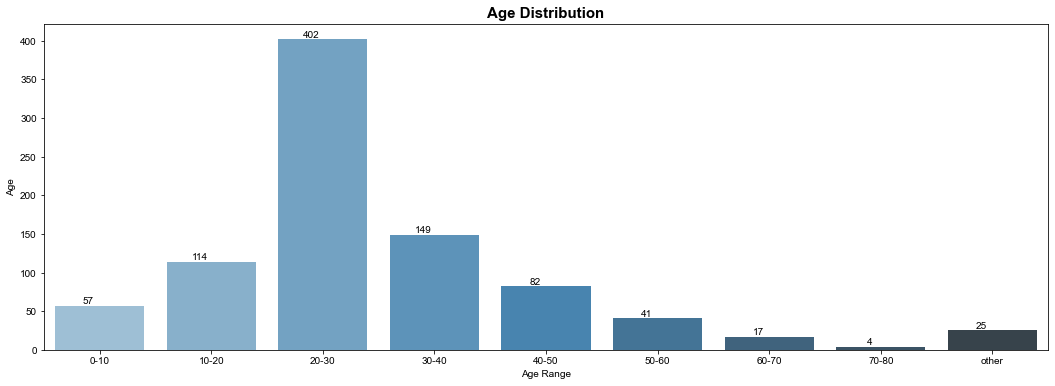

In [7]:
# Create a bar chart showing age range of people who boarded the titanic 
age_data = titanic["Age"].value_counts().sort_index()
plt.figure(figsize=(18, 6))
plt.title("Age Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Age Range")
plt.ylabel("Age-Range Frequency")

graph = sns.barplot(x=age_data.index, y=age_data, palette="Blues_d")
sns.set_style("darkgrid")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

#### Age Distribution:
Although with a mean age of 30 years it is seen from the chart above that most of the people who boarded the titanic were between the ages of 20 and 30 years old 

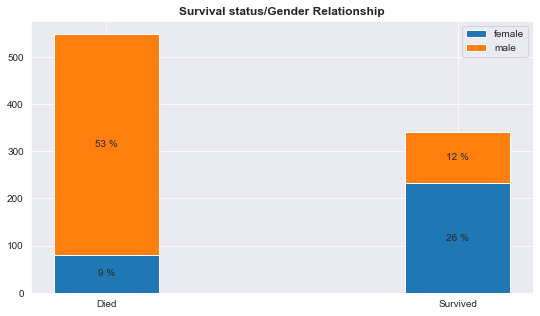

In [8]:
sex_surv = titanic.groupby("Survived")["Sex"].value_counts().sort_index().unstack()

fig, ax = plt.subplots(1,1, figsize=(9,5))
bf = np.zeros(len(sex_surv), dtype=float)
sex_surv

for col in sex_surv.columns:
    ax.bar(sex_surv.index, sex_surv[col], width=0.3, bottom=bf, label=col)
    bf += sex_surv[col]
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format((height/891) * 100), 
            horizontalalignment='center', 
            verticalalignment='center')
    
    
ax.set_title("Survival status/Gender Relationship", loc="center", fontsize=12, fontweight='bold')    
ax.legend()
plt.show()

### Survival Percentage:
Based off this analysis it is observed in the chart above that 62% of the passengers in this survey data died in the fatal accident and out of the survivors females had a higher survival rate. 

Our next talking point is going to be to determine if age played a major role in the survival chances of the passengers on the cruise like the gender did. The chart below gives us a better insight. 

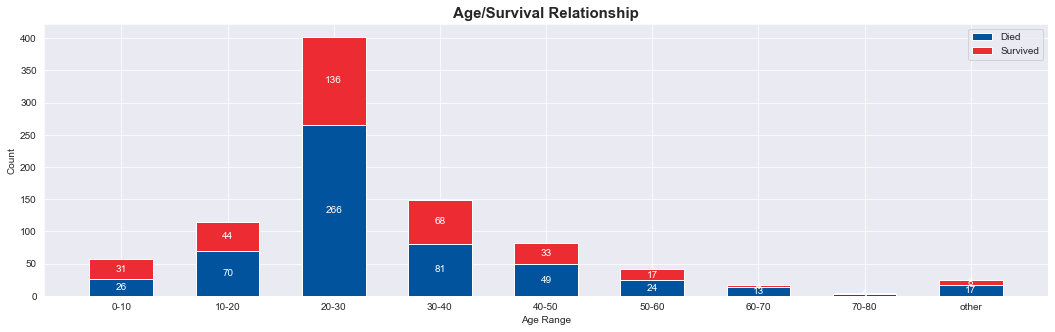

In [10]:
age_surv = titanic.groupby("Age")["Survived"].value_counts().sort_index().unstack()

fig, ax = plt.subplots(1,1, figsize=(18, 5))
af = np.zeros(len(age_surv), dtype=float)
colors=["#00539cff", "#ed2b33ff"]

for idx, col in enumerate(age_surv.columns):
    ax.bar(age_surv.index, age_surv[col], width=0.6, bottom=af, label=col, color=colors[idx])
    af += age_surv[col]
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center', color="white")
    
ax.legend()
plt.title("Age/Survival Relationship", fontsize=15, fontweight='bold')
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

From our analysis we see that young people within the age of twenty and thirty had higher chances of surviving, of the 342 people who survived 136 (39%) of them fall in this age range as well as 266 of the 549.

It is observed from this chart that only people in the 0-10 age range had a higher survival/death ratio, 54% of people in this age range survived this accident while people in the 70-80 age range had the lowest survival ratio with 75% of people in that age range dieing. 

### Predictive Analysis
#### Model Building: 
After drawing the above conclusions from our exploratory analysis, we want to build a model that'll predict the chances of survival of passengers. Our aim is to train the model with the information from this data (train data) so that predictions can be made on another survey set (test set) from the passengers of the RMC Titanic 

In [11]:
train_data = titanic.copy()

# Sort categorical variables in Survived column for prediction 
train_data["Survived"].replace("Survived", 1, inplace=True)
train_data["Survived"].replace("Died", 0, inplace=True)

# Return categorical variable in age column to original integer age in training data 
age = pd.read_csv("train.csv")
age = age["Age"]
age = age.fillna(30)
age = age.astype(int)
train_data["Age"] = age

# Sort categorical variable in Sex column 
gender = {"male": 0, "female": 1}
train_data["Sex"] = train_data["Sex"].map(gender)

# sort embarked column 
train_data["Embarked"].fillna("C", inplace=True)
ports = {"S": 1, "C": 2, "Q": 3}
train_data["Embarked"] = train_data["Embarked"].map(ports)

# sort Fare column 
train_data["Fare"] = train_data["Fare"].astype(int)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 

X = train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]]
y = train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = GradientBoostingClassifier(max_depth=6, learning_rate=0.05)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

test_acc = model.score(X_test, y_test)
train_acc = model.score(X_train, y_train)

print("Train-Set Accuracy: {:.1f} %\nTest-Set Accuracy: {:.1f} %".format(train_acc *100, test_acc*100))

Train-Set Accuracy: 92.5 %
Test-Set Accuracy: 78.9 %


Our model is based on Gradient Boosting Classifier an ensemble method that makes use of multiple machine learning methods to make more accurate predictions due to their ability to create and learn patterns from multiple trees and also to regularize to avoid overfitting. 

It can be seen from the prediction that we have a 92.5% fitting accuracy score for our training set and a 78.9% acurracy score on our testing set. This means that for any new data entry we want to test for we have a 78.9% chance of being accurate on whether they survive this fatal accident or not. 

Next, we are going to take a look at a new data (test_data) containing information from the passengers aboard the cruise ship and then predict whether they survive or not using the model we created from above. 